In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_history(filepath):
    infile = open(filepath,'rb')
    history = pickle.load(infile)
    infile.close()

    loss = []
    acc = []
    val_loss = []
    val_acc = []

    for i in range(len(history)):
        acc.append(history[i]['acc'])
        loss.append(history[i]['loss'])
        val_acc.append(history[i]['val_acc'])
        val_loss.append(history[i]['val_loss'])
        
    return acc, val_acc, loss, val_loss

20
[0.97295918 0.97142857]
[0.00775443 0.00763604]


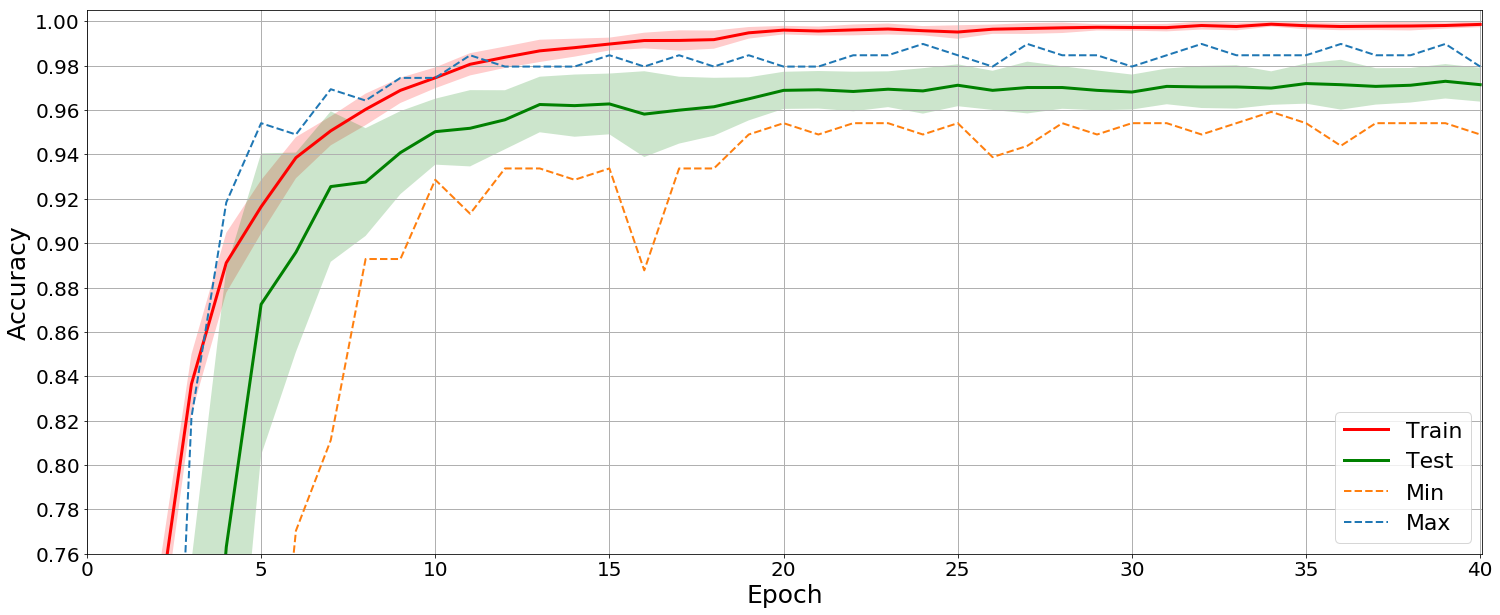

In [5]:
filepath = "../history.pkl"

infile = open(filepath,'rb')
history = pickle.load(infile)
infile.close()

loss = []
acc = []
val_loss = []
val_acc = []

print(len(history))
for i in range(len(history)):
    acc.append(history[i]['acc'])
    loss.append(history[i]['loss'])
    val_acc.append(history[i]['val_acc'])
    val_loss.append(history[i]['val_loss'])

plt.figure(figsize=(25,10))

plt.plot(np.arange(1, 41), np.mean(acc, axis=0), 'r', label='Train', linewidth=3)
plt.fill_between(np.arange(1, 41),np.mean(acc, axis=0)+np.std(acc, axis=0), np.mean(acc, axis=0)-np.std(acc, axis=0), facecolor='r', alpha=0.2)

plt.plot(np.arange(1, 41), np.mean(val_acc, axis=0), 'g', label='Test', linewidth=3)
plt.fill_between(np.arange(1, 41),np.mean(val_acc, axis=0)+np.std(val_acc, axis=0), np.mean(val_acc, axis=0)-np.std(val_acc, axis=0), facecolor='g', alpha=0.2)

plt.plot(np.arange(1, 41), np.min(val_acc, axis=0), 'C1--', label='Min', linewidth=2)
plt.plot(np.arange(1, 41), np.max(val_acc, axis=0), 'C0--', label='Max', linewidth=2)

print((np.mean(val_acc, axis=0)[-2:]))
print((np.std(val_acc, axis=0)[-2:]))

plt.legend(loc='lower right', prop={'size': 22})
plt.yticks(np.arange(0.76, 1.01, 0.02), fontsize=20)
plt.xticks(np.arange(0, 42, 5), fontsize=20)
plt.ylim((0.76, 1.005))
plt.xlim((0, 40.05))
plt.grid(linestyle='-', linewidth=1)
plt.ylabel("Accuracy", fontsize= 25)
plt.xlabel("Epoch", fontsize= 25)

plt.savefig("val_acc"+".png", bbox_inches='tight', dpi=150)

CSI_30_AMP_4000_PCA_94.pkl
0.2564482320745698
0.09235768253651168


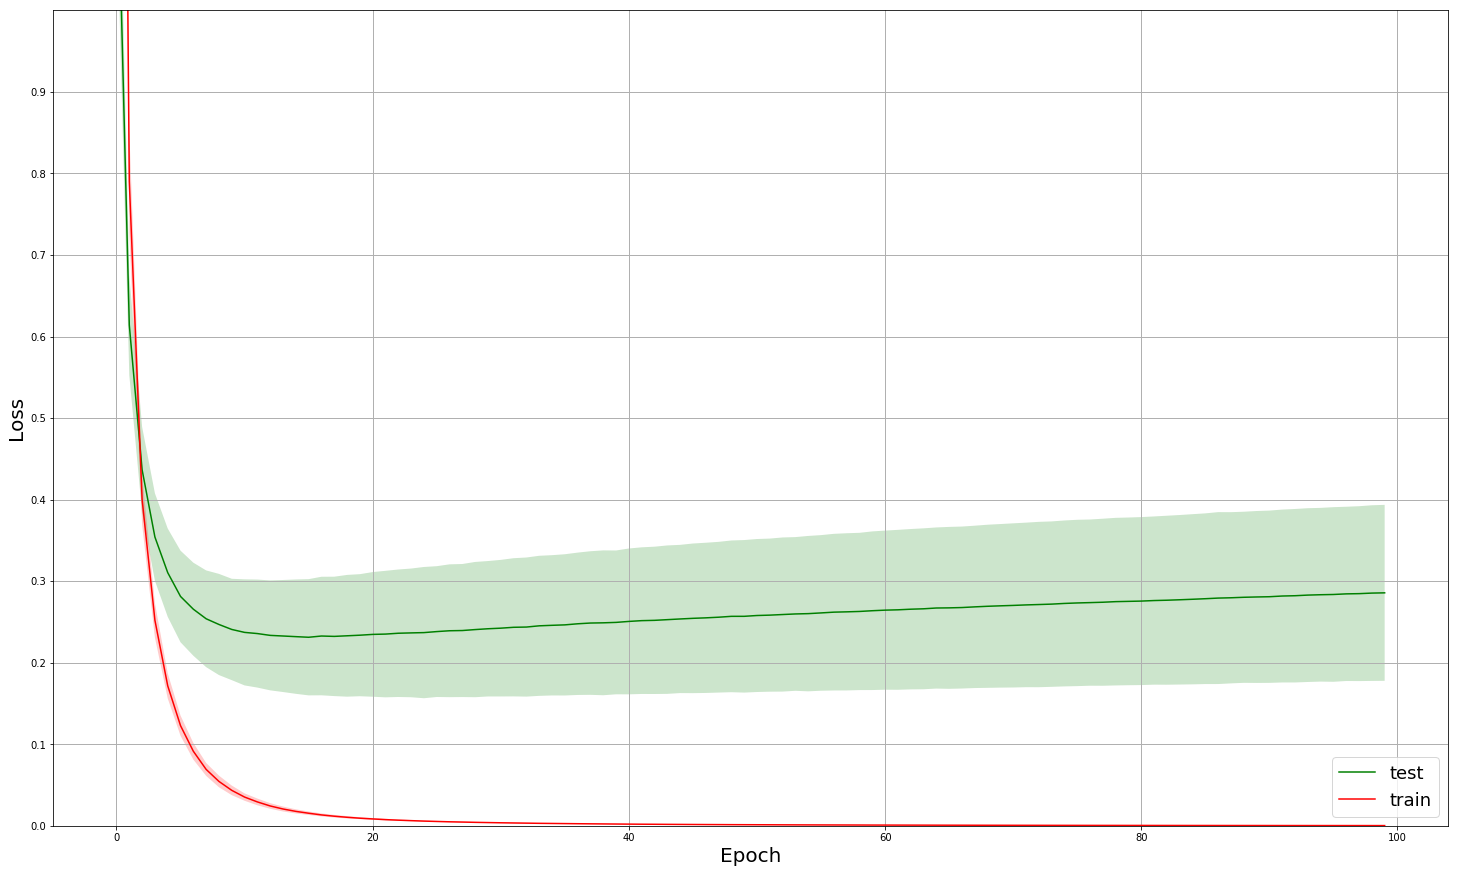

In [7]:
filepath = "/home/kalvik/Documents/neuralwave/data/mc/AMP/"
files = os.listdir(filepath)

files = ["CSI_30_AMP_4000_PCA_94.pkl"]
for file in files:
    if os.path.isfile(os.path.join(filepath, file)):
        print(file)
        file = file[:-4]
        
        infile = open(filepath+file+".pkl",'rb')
        history = pickle.load(infile)
        infile.close()

        loss = []
        acc = []
        val_loss = []
        val_acc = []

        for i in range(len(history)):
            acc.append(history[i]['acc'])
            loss.append(history[i]['loss'])
            val_acc.append(history[i]['val_acc'])
            val_loss.append(history[i]['val_loss'])
            
        plt.figure(figsize=(25,15))
        
        plt.plot(np.mean(val_loss, axis=0), 'g', label='test')
        plt.fill_between(np.arange(0, 100),np.mean(val_loss, axis=0)+np.std(val_loss, axis=0), np.mean(val_loss, axis=0)-np.std(val_loss, axis=0), facecolor='g', alpha=0.2)
            
        plt.plot(np.mean(loss, axis=0), 'r', label='train')
        plt.fill_between(np.arange(0, 100),np.mean(loss, axis=0)+np.std(loss, axis=0), np.mean(loss, axis=0)-np.std(loss, axis=0), facecolor='r', alpha=0.2)

        print(np.mean(np.mean(val_loss, axis=0)[20:80]))
        print(np.mean(np.std(val_loss, axis=0)[20:80]))
        
        plt.legend(loc='lower right', prop={'size': 18})
        plt.yticks(np.arange(0.0, 1, 0.1))
        plt.ylim((0.0, 1))
        plt.grid(linestyle='-', linewidth=1)
        plt.ylabel("Loss", fontsize= 20)
        plt.xlabel("Epoch", fontsize= 20)

        plt.savefig(filepath+'/plots/'+file+"_val_loss"+".png", bbox_inches='tight')

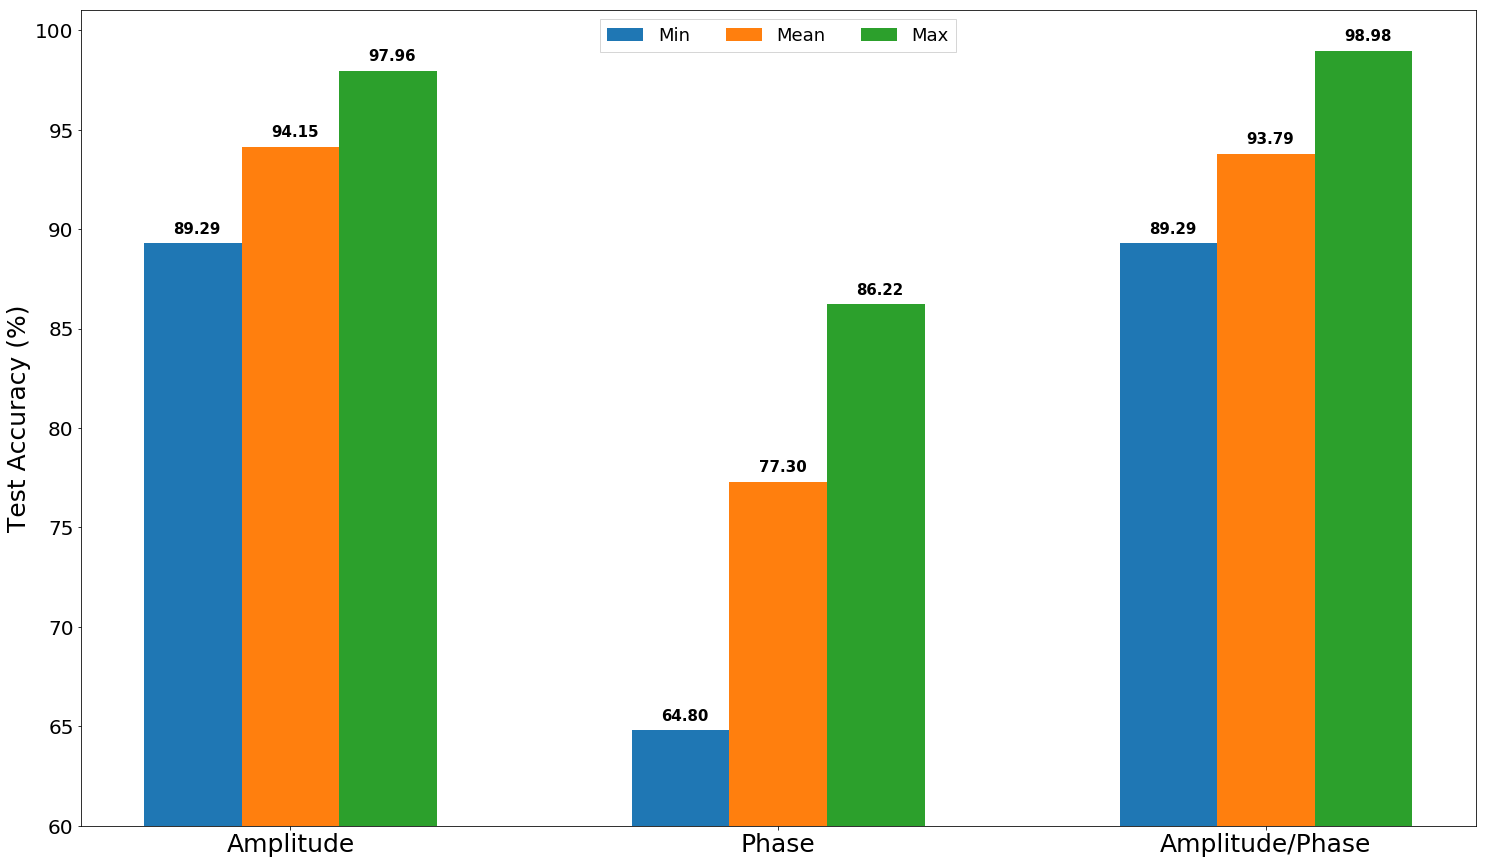

In [5]:
AMP = "/home/kalvik/Documents/neuralwave/data/mc/AMP/CSI_30_AMP_4000_PCA_94.pkl"
PH = "/home/kalvik/Documents/neuralwave/data/mc/PH/CSI_30_PH_4000_PCA_94.pkl"
AMP_PH = "/home/kalvik/Documents/neuralwave/data/mc/AMP_PH/CSI_30_AMP_PH_4000_PCA_94.pkl"

AMP = get_history(AMP)
PH = get_history(PH)
AMP_PH = get_history(AMP_PH)

plt.figure(figsize=(25,15))
   
x1 = plt.bar([0, 0.1, 0.2], [np.min(np.min(AMP[1], axis=0)[20:80]*100), np.mean(np.mean(AMP[1], axis=0)[20:80]*100), np.max(np.max(AMP[1], axis=0)[20:80]*100)], width = 0.1, color=['C0', 'C1', 'C2'])
plt.bar([0.5, 0.6, 0.7], [np.min(np.min(PH[1], axis=0)[20:80]*100), np.mean(np.mean(PH[1], axis=0)[20:80]*100), np.max(np.max(PH[1], axis=0)[20:80]*100)], width = 0.1, color=['C0', 'C1', 'C2'])
plt.bar([1.0, 1.1, 1.2], [np.min(np.min(AMP_PH[1], axis=0)[20:80]*100), np.mean(np.mean(AMP_PH[1], axis=0)[20:80]*100), np.max(np.max(AMP_PH[1], axis=0)[20:80]*100)], width = 0.1, color=['C0', 'C1', 'C2'])

plt.text((0-0.02)  , np.min(np.min(AMP[1], axis=0)[20:80]*100)+0.5, "{:.2f}".format(np.min(np.min(AMP[1], axis=0)[20:80]*100)), color='black', fontweight='bold', fontsize=15)
plt.text((0.1-0.02), np.mean(np.mean(AMP[1], axis=0)[20:80]*100)+0.5, "{:.2f}".format(np.mean(np.mean(AMP[1], axis=0)[20:80]*100)), color='black', fontweight='bold', fontsize=15)
plt.text((0.2-0.02), np.max(np.max(AMP[1], axis=0)[20:80]*100)+0.5, "{:.2f}".format(np.max(np.max(AMP[1], axis=0)[20:80]*100)), color='black', fontweight='bold', fontsize=15)

plt.text((0.5-0.02), np.min(np.min(PH[1], axis=0)[20:80]*100)+0.5, "{:.2f}".format(np.min(np.min(PH[1], axis=0)[20:80]*100)), color='black', fontweight='bold', fontsize=15)
plt.text((0.6-0.02), np.mean(np.mean(PH[1], axis=0)[20:80]*100)+0.5, "{:.2f}".format(np.mean(np.mean(PH[1], axis=0)[20:80]*100)), color='black', fontweight='bold', fontsize=15)
plt.text((0.7-0.02), np.max(np.max(PH[1], axis=0)[20:80]*100)+0.5, "{:.2f}".format(np.max(np.max(PH[1], axis=0)[20:80]*100)), color='black', fontweight='bold', fontsize=15)

plt.text((1.0-0.02), np.min(np.min(AMP_PH[1], axis=0)[20:80]*100)+0.5, "{:.2f}".format(np.min(np.min(AMP_PH[1], axis=0)[20:80]*100)), color='black', fontweight='bold', fontsize=15)
plt.text((1.1-0.02), np.mean(np.mean(AMP_PH[1], axis=0)[20:80]*100)+0.5, "{:.2f}".format(np.mean(np.mean(AMP_PH[1], axis=0)[20:80]*100)), color='black', fontweight='bold', fontsize=15)
plt.text((1.2-0.02), np.max(np.max(AMP_PH[1], axis=0)[20:80]*100)+0.5, "{:.2f}".format(np.max(np.max(AMP_PH[1], axis=0)[20:80]*100)), color='black', fontweight='bold', fontsize=15)

plt.ylabel("Test Accuracy (%)", fontsize= 25)
plt.xticks([0.1, 0.6, 1.1], ['Amplitude', 'Phase', 'Amplitude/Phase'], fontsize= 25)
plt.yticks(fontsize=20)
plt.legend((x1), ('Min', 'Mean', 'Max'), loc='upper center', prop={'size': 18}, ncol=3, fancybox=False, shadow=False)

plt.ylim((60, 101))
plt.savefig("/home/kalvik/Documents/neuralwave/data/AMP_PH_ANALYSIS.png", bbox_inches='tight', dpi=150)